# Home Credit Default Risk Competition(3)

# Import

In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder 
import os 
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns 

# Read in data

In [2]:
print(os.listdir('data/'))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'log_reg_baseline_1.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'random_forest_baseline_1.csv', 'random_forest_baseline_domain_1.csv', 'random_forest_baseline_engineered_1.csv', 'sample_submission.csv']


In [3]:
app_train = pd.read_csv('data/application_train.csv')
print('train data shape',app_train.shape) 
app_train.head()

train data shape (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_test = pd.read_csv('data/application_test.csv')
print('test data shape',app_test.shape)
app_test.head()

test data shape (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

## Examine the Distribution of the Target Column

In [5]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

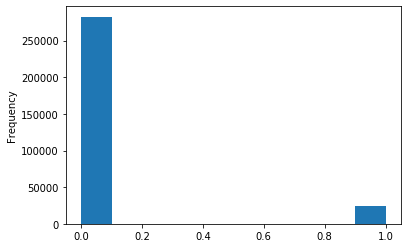

In [6]:
app_train['TARGET'].astype(int).plot.hist()

## Examine Missing Values 

In [7]:
def missing_values_table(df) :
    mis_val = df.isnull().sum()
    mis_val_perc = 100 * mis_val / len(df)
    
    mis_val_table = pd.concat([mis_val,mis_val_perc],axis = 1)
    
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'missing values', 1: '% of total values'})

    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of total values', ascending=False).round(1)
    
    print('your selected dataframe has {}columns '.format(df.shape[1]))
    print('There are {} columns that has missing values'.format(mis_val_table_ren_columns.shape[0]))
    
    return mis_val_table_ren_columns 

In [8]:
missing_values = missing_values_table(app_train)
missing_values.head(30)

your selected dataframe has 122columns 
There are 67 columns that has missing values


,missing values,% of total values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


## Column Types 

In [9]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [10]:
app_train.select_dtypes('object').apply(pd.Series.nunique,axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Label Encoding and One-Hot Encoding 

In [11]:
# Label Encoding
le = LabelEncoder()
le_count = 0 

for col in app_train:
    if app_train[col].dtype == 'object' :
        if len(list(app_train[col].unique())) <=2 :
            le.fit(app_train[col])
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            le_count += 1
            
print('{} colums were label encoded '.format(le_count))

3 colums were label encoded 


In [12]:
#One-Hot Encoding
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('training feature shape',app_train.shape)
print('testing feature shape',app_test.shape)

training feature shape (307511, 243)
testing feature shape (48744, 239)


### Aligning Training and Testing Data

In [13]:
# train 과 test 모두 같은 feature 갖게 하기
train_labels = app_train['TARGET']

app_train, app_test = app_train.align(app_test, join='inner',axis = 1)
app_train['TARGET'] = train_labels 

print('train feature shape',app_train.shape)
print('test feature shape',app_test.shape)

train feature shape (307511, 240)
test feature shape (48744, 239)


## Back to Exploratory Data Analysis 

### Anomalies 

In [14]:
(app_train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [15]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'days employment')

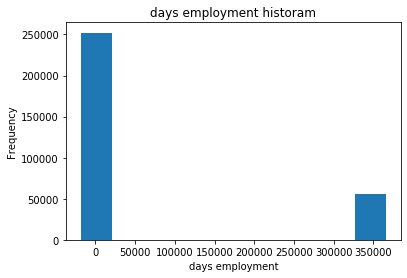

In [16]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'days employment historam')
plt.xlabel('days employment')

In [17]:
# 비정상 고객이 정상고객에 비해 대출상환 비율이 더 높은지 보자
# 365243 = MAX
anom = app_train[app_train['DAYS_EMPLOYED']==365243]
non_anom = app_train[app_train['DAYS_EMPLOYED']!= 365243]
print('non_anom default on {:.2f}% of loans'.format(100*non_anom['TARGET'].mean()))
print('the anomalies default on {:.2f}% of loans'.format(100*anom['TARGET'].mean()))
print('There are {} anomalies days of employment.'.format(len(anom)))

non_anom default on 8.66% of loans
the anomalies default on 5.40% of loans
There are 55374 anomalies days of employment.


Text(0.5, 0, 'days employment')

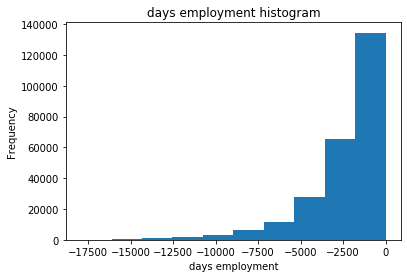

In [18]:
#train 에서 별칭 없애기
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan},inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'days employment histogram')
plt.xlabel('days employment')

In [19]:
#test에서 별칭 없애기
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243
app_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

print('there are {} anomalies in the test data out of {} entries'.format(
    app_test['DAYS_EMPLOYED_ANOM'].sum(), len(app_test)))

there are 9274 anomalies in the test data out of 48744 entries


### Correlations 

In [20]:
#target 과 상관관계로 정렬
correlations = app_train.corr()['TARGET'].sort_values()

print('most positive correlations : \n',correlations.tail(15))
print('\n most negative correlations : \n',correlations.head(15))

most positive correlations : 
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

 most neg

### Effect of Age on Repayment 

In [21]:
# 양수로 표현된 birth와 target 의 상관계수 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982692

Text(0, 0.5, 'count')

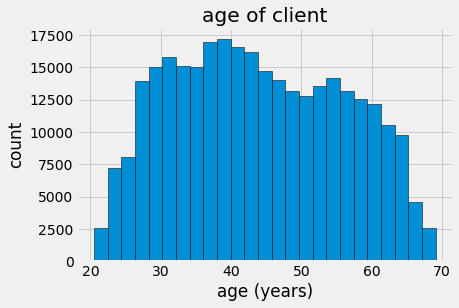

In [22]:
plt.style.use('fivethirtyeight')

#age의 분포 - histogram 
plt.hist(app_train['DAYS_BIRTH']/365, edgecolor = 'k',bins=25)
plt.title('age of client')
plt.xlabel('age (years)')
plt.ylabel('count')

Text(0.5, 1.0, 'distribution of age')

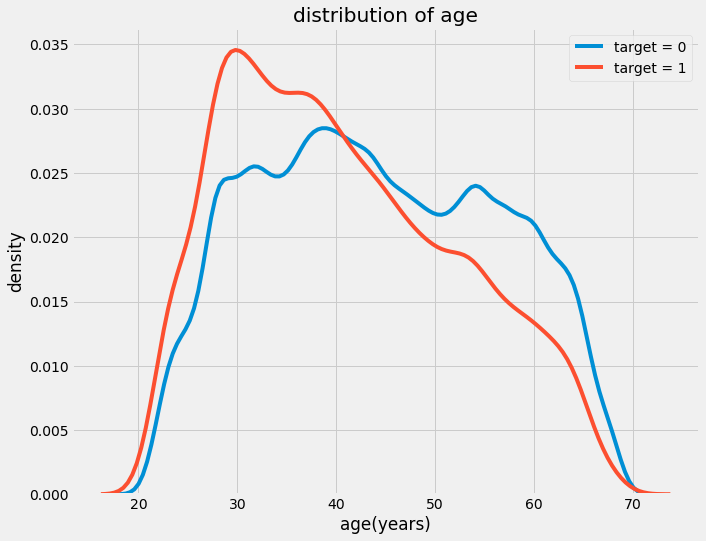

In [23]:
plt.figure(figsize = (10,8))

#target value 별 사람의 나이 분포  - kdeplot
sns.kdeplot(app_train.loc[app_train['TARGET']==0,'DAYS_BIRTH']/365,label ='target = 0')
sns.kdeplot(app_train.loc[app_train['TARGET']==1,'DAYS_BIRTH']/365, label = 'target = 1')

plt.xlabel('age(years)')
plt.ylabel('density')
plt.title('distribution of age')

In [24]:
age_data = app_train[['TARGET','DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 

age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'],bins = np.linspace(20,70,num=11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [25]:
#구간(bin) 에 따라 target의 평균 계산 
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'failure to repay by age group')

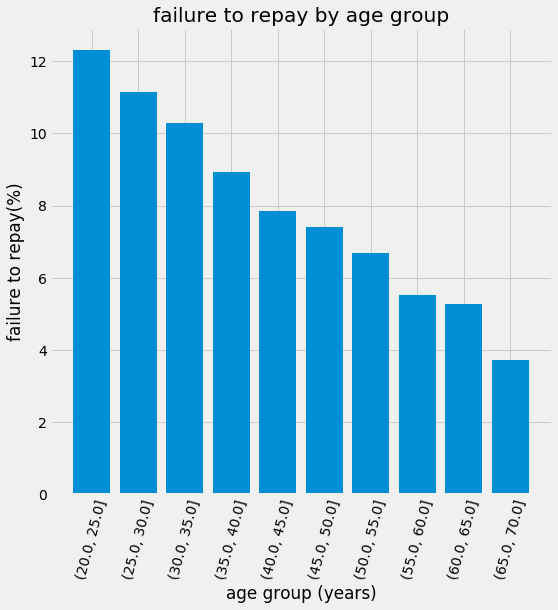

In [26]:
plt.figure(figsize=(8,8))

# 각 연령대 별 평균 target - barplot
plt.bar(age_groups.index.astype(str),100 *age_groups['TARGET'])
plt.xticks(rotation = 75)
plt.xlabel('age group (years)')
plt.ylabel('failure to repay(%)')
plt.title('failure to repay by age group')

### Exterior Sources 

In [27]:
# EXT SORUCE 와 TARGET variable의 상관관계
ext_data = app_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1, 'correlation heatmap')

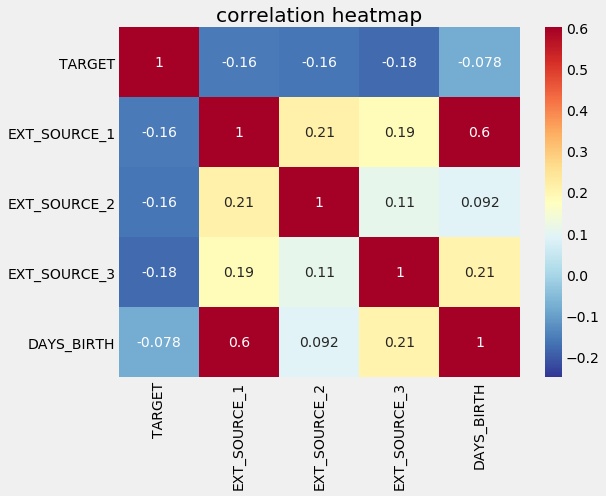

In [28]:
plt.figure(figsize = (8,6))

#상관관계 heatmap 
sns.heatmap(ext_data_corrs,cmap=plt.cm.RdYlBu_r,vmin=-0.25,annot= True, vmax = 0.6)
plt.title('correlation heatmap')

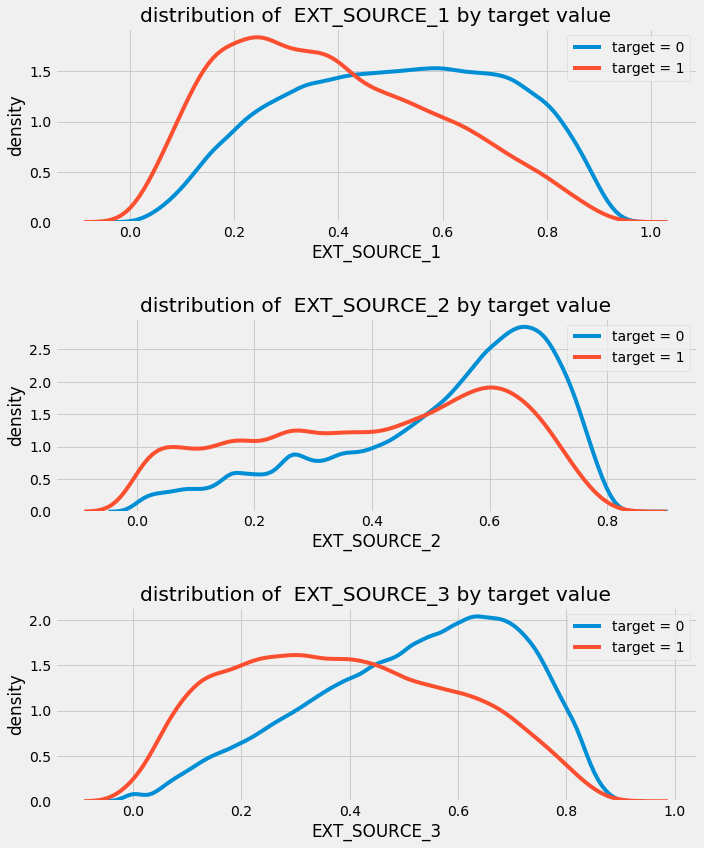

In [29]:
plt.figure(figsize = (10,12))

for i, source in enumerate(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']) :
    plt.subplot(3,1,i+1)
    sns.kdeplot(app_train.loc[app_train['TARGET']==0,source],label = 'target = 0')
    sns.kdeplot(app_train.loc[app_train['TARGET']== 1, source],label = 'target = 1')
    
    plt.title('distribution of  {} by target value'.format(source))
    plt.xlabel(str(source))
    plt.ylabel('density')
    
#subplot 사이의 간격을 조절
plt.tight_layout(h_pad=2.5)

## Pairs Plot 

Text(0.5, 1.05, 'ext source and age features paris plot')

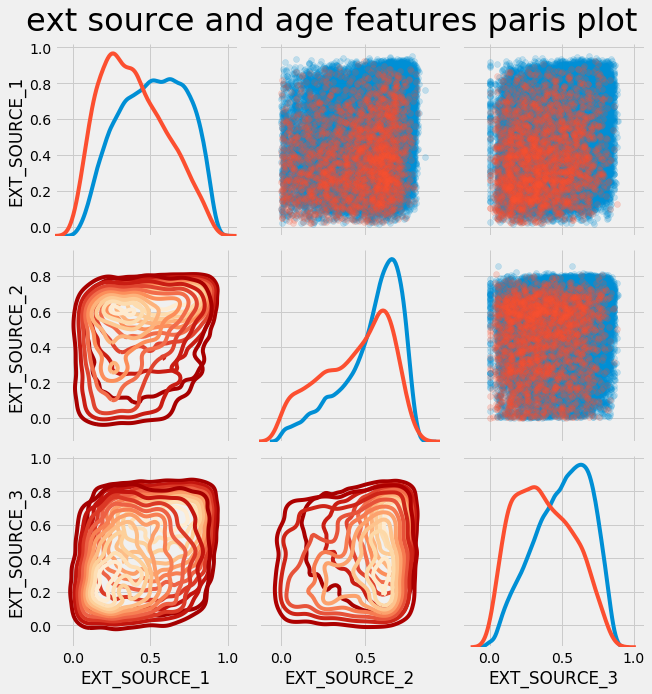

In [30]:
plot_data = ext_data.drop(columns=['DAYS_BIRTH']).copy()
plot_data = plot_data.dropna().loc[:100000,:]

def corr_func(x,y,**kwargs) :
    r = np.corrcoef(x,y)[0][1]
    ax = plt.gca()
    ax.annotate('r = {:.2f}'.format(r),
               xy = (.2,.8),
               xycoords = ax.transAxes,
               size = 20)
    
grid =sns.PairGrid(data=plot_data,
                  size= 3,
                  diag_sharey=False,
                  hue='TARGET',
                  vars=[x for x in list(plot_data.columns) if x!= 'TARGET'])

grid.map_upper(plt.scatter,alpha=0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap=plt.cm.OrRd_r)
plt.suptitle('ext source and age features paris plot',size = 32, y = 1.05)

# Feature Engineering 

## Polynominal Features

In [32]:
poly_features = app_train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

poly_target = poly_features['TARGET']
poly_features =poly_features.drop(columns = ['TARGET'])

In [33]:
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.fit_transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree = 3)

In [34]:
poly_transformer.fit(poly_features)

poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynominal features shape:',poly_features.shape)

Polynominal features shape: (307511, 35)


In [35]:
poly_transformer.get_feature_names(input_features=[
        'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH'
])

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'DAYS_BIRTH^3']

In [36]:
# TARGET과 새로운 feature간의 상관관계
poly_features = pd.DataFrame(poly_features,columns = poly_transformer.get_feature_names(
    ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']))

poly_features['TARGET'] = poly_target 
poly_corrs = poly_features.corr()['TARGET'].sort_values()

print(poly_corrs.head(10))
print(poly_corrs.tail(10))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
EXT_SOURCE_1                -0.098887
EXT_SOURCE_1^2 DAYS_BIRTH   -0.097507
EXT_SOURCE_1 DAYS_BIRTH^2   -0.094913
EXT_SOURCE_1^2              -0.091034
EXT_SOURCE_1^3              -0.083005
DAYS_BIRTH                  -0.078239
DAYS_BIRTH^2                -0.076672
DAYS_BIRTH^3                -0.074273
TARGET                       1.000000
1                                 NaN
Name: TARGET, dtype: float64


In [37]:
poly_features_test = pd.DataFrame(poly_features_test,
                                 columns=poly_transformer.get_feature_names(
                                 ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']))

In [38]:
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features,on='SK_ID_CURR',how ='left')

poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features,on='SK_ID_CURR',how ='left')

app_train_poly,app_test_poly = app_train_poly.align(app_test_poly,join='inner',axis = 1)

print('training data with polynomial features shape :', app_train_poly.shape)
print('testing data with polynomial features shape :', app_test_poly.shape)

training data with polynomial features shape : (307511, 275)
testing data with polynomial features shape : (48744, 275)


In [39]:
app_train_poly.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,EXT_SOURCE_2^3,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0.018181,0.009637,654.152107,0.005108,346.733022,2.353667e+07,0.002707,183.785678,1.247560e+07,8.468590e+11
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0.240927,0.207254,6491.237078,0.178286,5583.975307,1.748916e+08,0.153368,4803.518937,1.504475e+08,4.712058e+12
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0.171798,0.225464,5885.942404,0.295894,7724.580288,2.016572e+08,0.388325,10137.567875,2.646504e+08,6.908939e+12
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0.275185,0.226462,8040.528832,0.186365,6616.894625,2.349331e+08,0.153368,5445.325225,1.933364e+08,6.864416e+12
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0.033616,0.055754,2076.117157,0.092471,3443.335521,1.282190e+08,0.153368,5710.929881,2.126570e+08,7.918677e+12
5,100008,0,0,1,0,99000.0,490495.5,27517.5,454500.0,0.035792,...,0.044446,0.077948,2125.674698,0.136703,3727.930293,1.016616e+08,0.239745,6537.907365,1.782904e+08,4.862024e+12
6,100009,0,1,1,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,...,0.379503,0.257926,7222.093969,0.175297,4908.432271,1.374393e+08,0.119139,3335.972567,9.340938e+07,2.615523e+12
7,100010,0,1,1,0,360000.0,1530000.0,42075.0,1530000.0,0.003122,...,0.364422,0.275839,9617.173847,0.208789,7279.460485,2.537995e+08,0.158037,5509.991376,1.921067e+08,6.697829e+12
8,100011,0,0,1,0,112500.0,1019610.0,33826.5,913500.0,0.018634,...,0.008710,0.031822,850.829793,0.116265,3108.614159,8.311569e+07,0.424790,11357.714633,3.036737e+08,8.119389e+12
9,100012,1,0,1,0,135000.0,405000.0,20250.0,405000.0,0.019689,...,0.416236,0.298404,8066.130508,0.213929,5782.689256,1.563113e+08,0.153368,4145.667492,1.120611e+08,3.029114e+12


## Domain Knowlege Features 

In [40]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] =  app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [41]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / \
    app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / \
    app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / \
    app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / \
    app_test_domain['DAYS_BIRTH']

### Visualize New Variables 

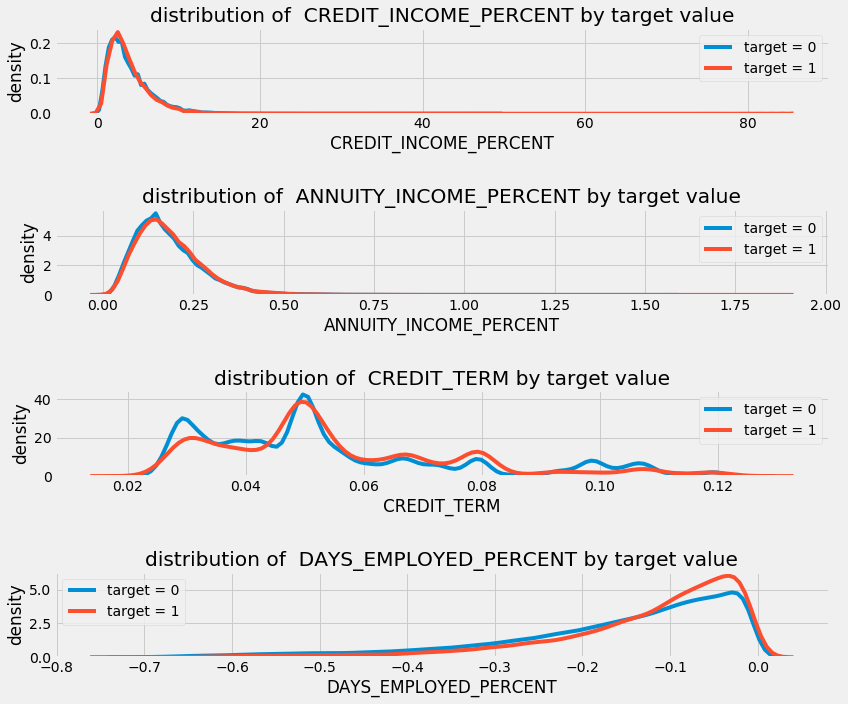

In [42]:
plt.figure(figsize = (12,10))

for i, feature in enumerate(['CREDIT_INCOME_PERCENT','ANNUITY_INCOME_PERCENT','CREDIT_TERM','DAYS_EMPLOYED_PERCENT']) :
    plt.subplot(4, 1, i +1 )
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==0,feature],label = 'target = 0')
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET']==1,feature],label = 'target = 1')
    
    plt.title('distribution of  {} by target value'.format(feature))
    plt.xlabel(str(feature))
    plt.ylabel('density')
    
plt.tight_layout(h_pad = 2.5)

# Baseline 

## Logistic Regression Implemetation

In [45]:
from sklearn.preprocessing import MinMaxScaler 

if 'TARGET' in app_train :
    train = app_train.drop(columns = ['TARGET'])
else :
    train = app_train.copy()

features = list(train.columns)
test = app_test.copy()

imputer = SimpleImputer(strategy='median')
scaler = MinMaxScaler(feature_range=(0,1))
imputer.fit(train)

train = imputer.transform(train)
test = imputer.transform(test)

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('training data shape :',train.shape)
print('testing data shape :',test.shape)

training data shape : (307511, 240)
testing data shape : (48744, 240)


In [46]:
from sklearn.linear_model import LogisticRegression 

log_reg = LogisticRegression(C = 0.0001)
log_reg.fit(train,train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
log_reg_pred = log_reg.predict_proba(test)[:,1]

In [49]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred 

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.078515
1,100005,0.137926
2,100013,0.082194
3,100028,0.080921
4,100038,0.132618


## Improved Model : Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier 

random_forest = RandomForestClassifier(n_estimators=100, random_state=50,n_jobs=-1)


In [52]:
random_forest.fit(train, train_labels)

feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame([{'feature': features, 'importance':feature_importance_values}])

predictions = random_forest.predict_proba(test)[:,1]

In [53]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

### Make Predictions using Engineered Features 

In [54]:
# Polynomial features 

poly_features_names = list(app_train_poly.columns)
imputer = SimpleImputer(strategy='median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.fit_transform(app_test_poly)

scaler = MinMaxScaler(feature_range=(0,1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.fit_transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators=100,random_state=50,verbose=1,n_jobs= -1)


In [56]:
random_forest_poly.fit(poly_features, train_labels)

predictions = random_forest_poly.predict_proba(poly_features_test)[:,1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished


ValueError: Number of features of the model must match the input. Model n_features is 275 and input n_features is 240 

In [57]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions 

In [58]:
# domain features 
app_train_domain = app_train_domain.drop(columns = 'TARGET')
domain_features_name = list(app_train_domain.columns)

imputer = SimpleImputer(strategy='median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

scaler = MinMaxScaler(feature_range = (0,1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

In [61]:
random_forest_domain = RandomForestClassifier(
n_estimators=100,random_state=50,verbose=1,n_jobs=-1)

random_forest_domain.fit(domain_features,train_labels)

feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame(
    {'feature': domain_features_name, 'importance': feature_importance_values_domain})

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


In [62]:
predictions = random_forest_domain.predict_proba(domain_features_test)[:,1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished


In [63]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

## Model Interpretation : Feature Importances

In [64]:
def plot_feature_importances(df):
    # importance를 기준으로 feature를 정렬
    df = df.sort_values('importance', ascending=False).reset_index()
    
    # 정규화
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    
    # horizontal bar로 feature importance 시각화
    plt.figure(figsize=(10, 6))
    ax = plt.subplot()
    
    # 역정렬
    ax.barh(list(reversed(list(df.index[:15]))),
           df['importance_normalized'].head(15),
           align='center',
           edgecolor='k')
    
    # yticks과 label 설정
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
        # labeling plot
    plt.xlabel('normalized importance')
    plt.title('feature importances')
    
    plt.show()
    
    return df

In [66]:
feature_importances_sorted = plot_feature_importances(feature_importances)

ValueError: Length of passed values is 240, index implies 1.